In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import utils
from constants import *

###  System Price of electricity, pence per kilowatt-hour
Source: ONS calculations from BMRS data © Elexon Limited copyright and database right 2024

The System Price is used to **settle the difference between contracted generation or consumption of electricity and actual generation or consumption**. This is calculated for each half hour trading period in the Balancing Market, which is the mechanism used to balance supply and demand on Great Britain’s electricity market.

Companies are contracted **to generate or consume**a certain amount of electricity within each half-hour (known as the Settlement Period), however this may differ from the actual amount generated or consumed. Where companies have generated more or less than the amount of energy their customers consume, this difference is balanced by the UK’s National Grid Transmission System, which buys or sells enough electricity to reconcile the difference. The System Price is designed to reflect the cost incurred by National Grid in doing this.

In [2]:
system_prices = pd.read_excel("data/electricitypricesdataset270624.xlsx", sheet_name="Data")
system_prices[DATE_COLUMN] = pd.to_datetime(system_prices[DATE_COLUMN])
system_prices.set_index(DATE_COLUMN)
system_prices.head()

,Date,Daily average,7-day average
0,2020-01-01,3.951,3.721
1,2020-01-02,1.771,3.486
2,2020-01-03,2.135,3.113
3,2020-01-04,2.700,2.989
4,2020-01-05,2.758,2.853


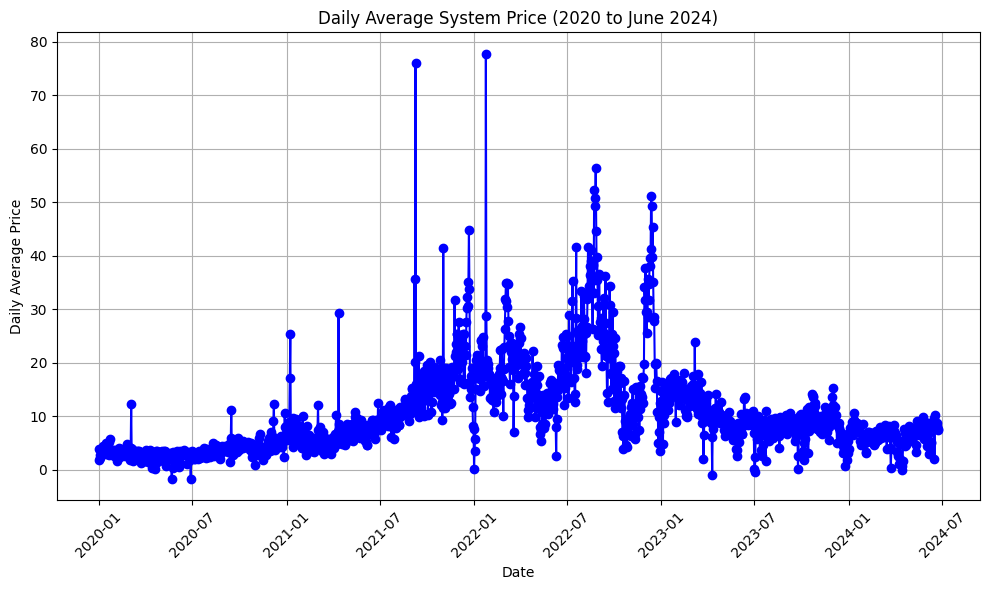

In [3]:
# Graph the daily average system price from 2020 to June 2024

# Plot the daily average system price
plt.figure(figsize=(10, 6))
plt.plot(system_prices[DATE_COLUMN], system_prices['Daily average'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Daily Average System Price (2020 to June 2024)')
plt.xlabel(DATE_COLUMN)
plt.ylabel('Daily Average Price')
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [4]:
def plot_data_for_date_range(data, start_date, end_date,plot=True):
    # Assuming 'system_prices' is your DataFrame
    data[DATE_COLUMN] = pd.to_datetime(data[DATE_COLUMN])

    # Filter the data within the date range
    mask = (data[DATE_COLUMN] >= start_date) & (data[DATE_COLUMN] <= end_date)
    filtered_data = data.loc[mask]

    # Calculate descriptive statistics
    mean_price = filtered_data['Daily average'].mean()
    std_dev = filtered_data['Daily average'].std()

    # Identify data points outside 1 and 2 standard deviations
    one_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - std_dev)]
    two_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + 2 * std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - 2 * std_dev)]
    if plot:
        # Plot the daily average system price for the filtered date range
        plt.figure(figsize=(10, 6))
        plt.plot(filtered_data[DATE_COLUMN], filtered_data['Daily average'], linestyle='-', color='b')

        # Highlight regions outside 1 standard deviation
        plt.fill_between(filtered_data[DATE_COLUMN], mean_price - std_dev, mean_price + std_dev, color='yellow', alpha=0.3)

        # Highlight regions outside 2 standard deviations
        plt.fill_between(filtered_data[DATE_COLUMN], mean_price - 2 * std_dev, mean_price + 2 * std_dev, color='red', alpha=0.3)

        # Customize the plot
        plt.title(f'Daily Average System Price from {start_date} to {end_date}')
        plt.xlabel(DATE_COLUMN)
        plt.ylabel('Daily Average Price')
        plt.grid(True)
        plt.xticks(rotation=45)

        # Show plot
        plt.tight_layout()
        plt.show()


    # Calculate descriptive statistics
    mean_price = filtered_data['Daily average'].mean()
    median_price = filtered_data['Daily average'].median()
    variance_price = filtered_data['Daily average'].var()
    std_dev = filtered_data['Daily average'].std()
    min_price = filtered_data['Daily average'].min()
    max_price = filtered_data['Daily average'].max()

    # Calculate the number of points outside 1 and 2 standard deviations
    one_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - std_dev)]
    two_std_dev_outliers = filtered_data[(filtered_data['Daily average'] > mean_price + 2 * std_dev) | 
                                         (filtered_data['Daily average'] < mean_price - 2 * std_dev)]
    
    num_one_std_dev_outliers = one_std_dev_outliers.shape[0]
    num_two_std_dev_outliers = two_std_dev_outliers.shape[0]

    total_points = filtered_data.shape[0]
    pct_one_std_dev_outliers = (num_one_std_dev_outliers / total_points) * 100
    pct_two_std_dev_outliers = (num_two_std_dev_outliers / total_points) * 100

    # Print the descriptive statistics
    print(f'Descriptive Statistics from {start_date} to {end_date}:')
    print(f'Mean: {mean_price}')
    print(f'Median: {median_price}')
    print(f'Variance: {variance_price}')
    print(f'Minimum: {min_price}')
    print(f'Maximum: {max_price}')
    print(f'Number of points outside 1 standard deviation: {num_one_std_dev_outliers} ({pct_one_std_dev_outliers:.2f}%)')
    print(f'Number of points outside 2 standard deviations: {num_two_std_dev_outliers} ({pct_two_std_dev_outliers:.2f}%)')

    # Prepare dictionary with descriptive statistics and outlier information
    statistics_dict = {
        'start_date': start_date,
        'end_date': end_date,
        'mean_price': mean_price,
        'median_price': median_price,
        'variance_price': variance_price,
        'std_deviation': std_dev,
        'min_price': min_price,
        'max_price': max_price,
        'num_outliers_1_std_dev': num_one_std_dev_outliers,
        'pct_outliers_1_std_dev': pct_one_std_dev_outliers,
        'num_outliers_2_std_dev': num_two_std_dev_outliers,
        'pct_outliers_2_std_dev': pct_two_std_dev_outliers
    }

    return statistics_dict    


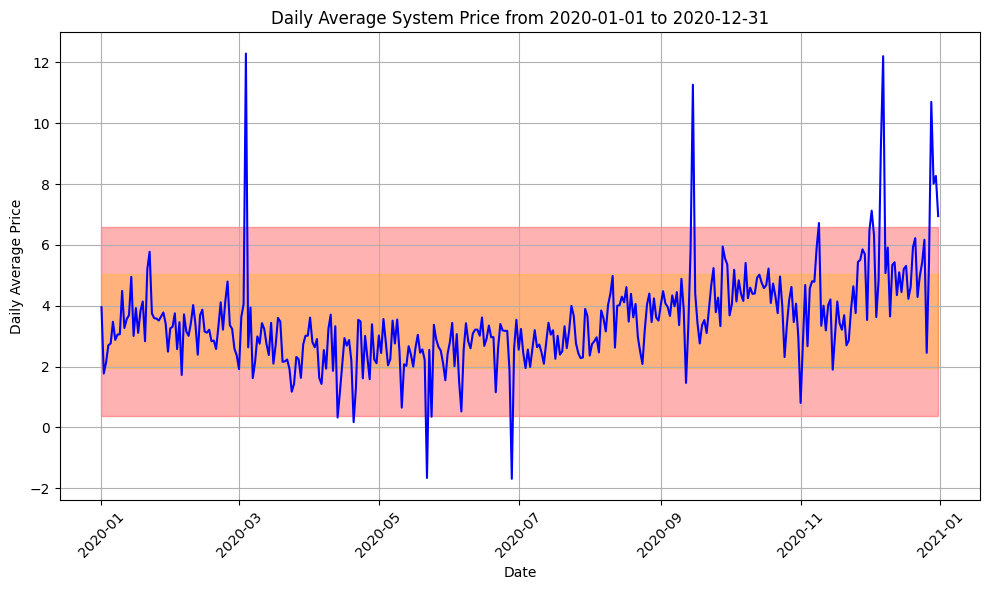

Descriptive Statistics from 2020-01-01 to 2020-12-31:
Mean: 3.494478142076503
Median: 3.3355
Variance: 2.408568085822292
Minimum: -1.691
Maximum: 12.289
Number of points outside 1 standard deviation: 69 (18.85%)
Number of points outside 2 standard deviations: 15 (4.10%)


{'start_date': '2020-01-01',
 'end_date': '2020-12-31',
 'mean_price': 3.494478142076503,
 'median_price': 3.3355,
 'variance_price': 2.408568085822292,
 'std_deviation': 1.551956212598246,
 'min_price': -1.691,
 'max_price': 12.289,
 'num_outliers_1_std_dev': 69,
 'pct_outliers_1_std_dev': 18.852459016393443,
 'num_outliers_2_std_dev': 15,
 'pct_outliers_2_std_dev': 4.098360655737705}

In [5]:
plot_data_for_date_range(system_prices,'2020-01-01', '2020-12-31')

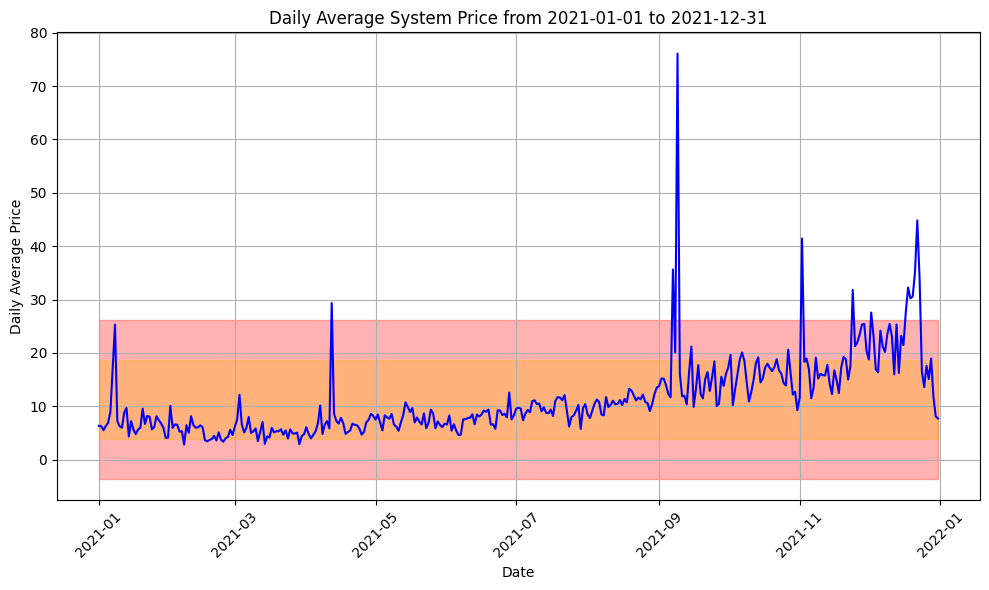

Descriptive Statistics from 2021-01-01 to 2021-12-31:
Mean: 11.248369863013698
Median: 9.144
Variance: 54.937008464473884
Minimum: 2.827
Maximum: 76.078
Number of points outside 1 standard deviation: 54 (14.79%)
Number of points outside 2 standard deviations: 13 (3.56%)


{'start_date': '2021-01-01',
 'end_date': '2021-12-31',
 'mean_price': 11.248369863013698,
 'median_price': 9.144,
 'variance_price': 54.937008464473884,
 'std_deviation': 7.411950381948997,
 'min_price': 2.827,
 'max_price': 76.078,
 'num_outliers_1_std_dev': 54,
 'pct_outliers_1_std_dev': 14.794520547945206,
 'num_outliers_2_std_dev': 13,
 'pct_outliers_2_std_dev': 3.5616438356164384}

In [6]:
plot_data_for_date_range(system_prices,'2021-01-01', '2021-12-31')

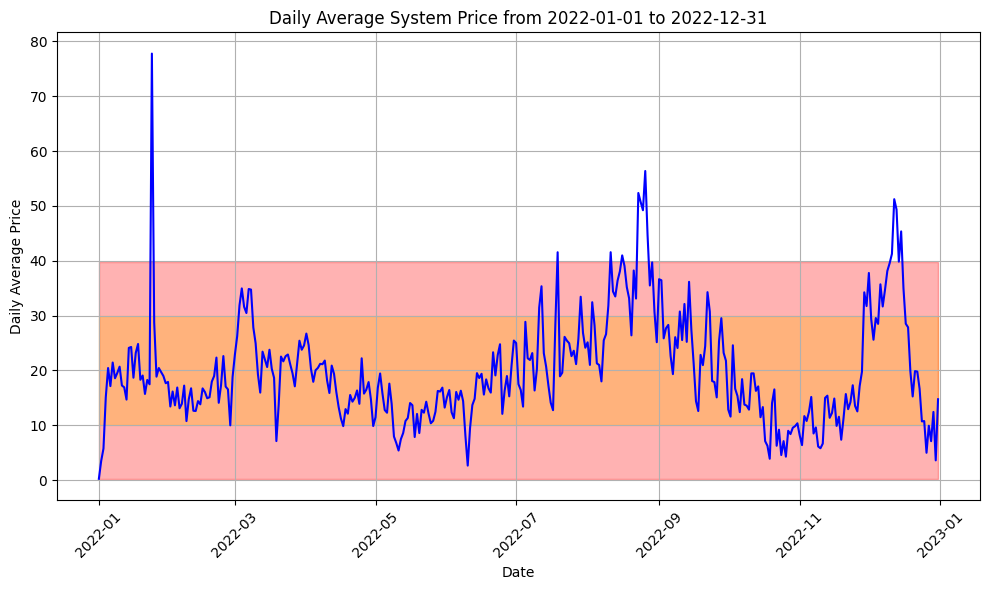

Descriptive Statistics from 2022-01-01 to 2022-12-31:
Mean: 20.008887671232877
Median: 18.006
Variance: 97.56512746811683
Minimum: 0.236
Maximum: 77.79
Number of points outside 1 standard deviation: 95 (26.03%)
Number of points outside 2 standard deviations: 15 (4.11%)


{'start_date': '2022-01-01',
 'end_date': '2022-12-31',
 'mean_price': 20.008887671232877,
 'median_price': 18.006,
 'variance_price': 97.56512746811683,
 'std_deviation': 9.877506136070826,
 'min_price': 0.236,
 'max_price': 77.79,
 'num_outliers_1_std_dev': 95,
 'pct_outliers_1_std_dev': 26.027397260273972,
 'num_outliers_2_std_dev': 15,
 'pct_outliers_2_std_dev': 4.10958904109589}

In [7]:
plot_data_for_date_range(system_prices,'2022-01-01', '2022-12-31')

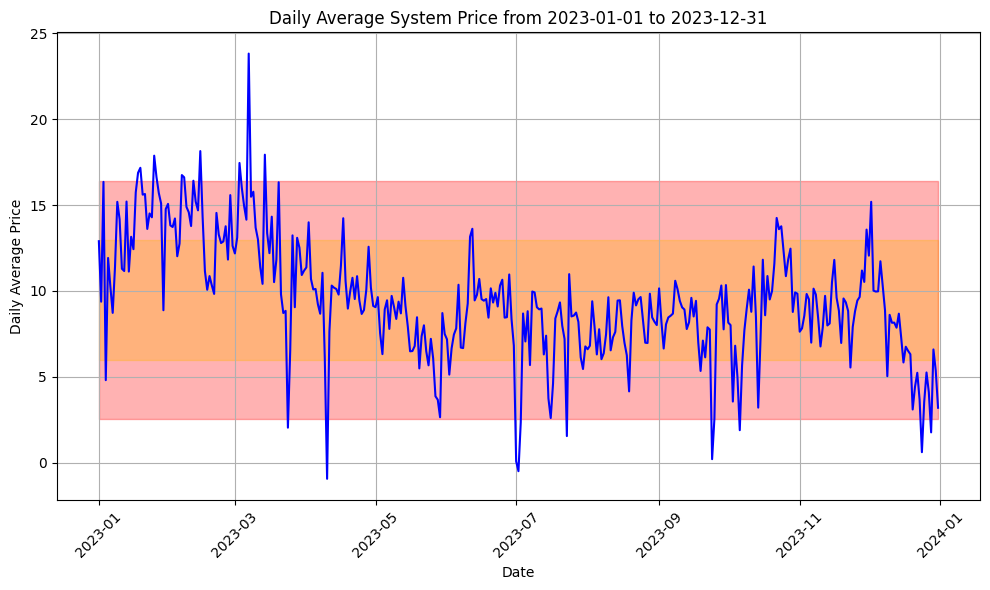

Descriptive Statistics from 2023-01-01 to 2023-12-31:
Mean: 9.469106849315068
Median: 9.269
Variance: 12.055958716573835
Minimum: -0.934
Maximum: 23.818
Number of points outside 1 standard deviation: 102 (27.95%)
Number of points outside 2 standard deviations: 21 (5.75%)


{'start_date': '2023-01-01',
 'end_date': '2023-12-31',
 'mean_price': 9.469106849315068,
 'median_price': 9.269,
 'variance_price': 12.055958716573835,
 'std_deviation': 3.472169165892387,
 'min_price': -0.934,
 'max_price': 23.818,
 'num_outliers_1_std_dev': 102,
 'pct_outliers_1_std_dev': 27.945205479452056,
 'num_outliers_2_std_dev': 21,
 'pct_outliers_2_std_dev': 5.7534246575342465}

In [8]:
plot_data_for_date_range(system_prices,'2023-01-01', '2023-12-31')

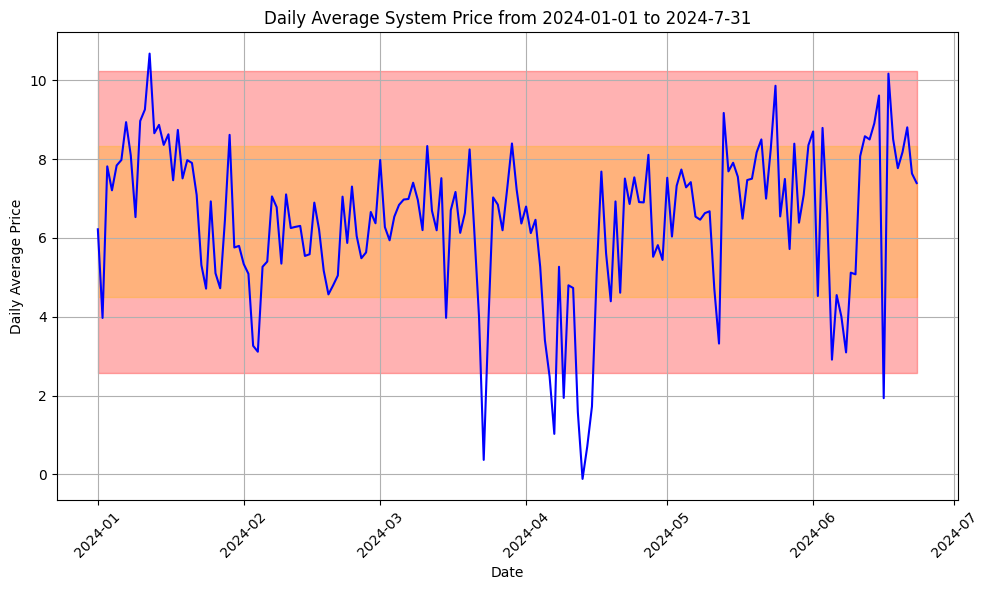

Descriptive Statistics from 2024-01-01 to 2024-7-31:
Mean: 6.412742857142857
Median: 6.677
Variance: 3.6673070197044324
Minimum: -0.112
Maximum: 10.677
Number of points outside 1 standard deviation: 47 (26.86%)
Number of points outside 2 standard deviations: 10 (5.71%)


{'start_date': '2024-01-01',
 'end_date': '2024-7-31',
 'mean_price': 6.412742857142857,
 'median_price': 6.677,
 'variance_price': 3.6673070197044324,
 'std_deviation': 1.9150214149466926,
 'min_price': -0.112,
 'max_price': 10.677,
 'num_outliers_1_std_dev': 47,
 'pct_outliers_1_std_dev': 26.857142857142858,
 'num_outliers_2_std_dev': 10,
 'pct_outliers_2_std_dev': 5.714285714285714}

In [9]:
plot_data_for_date_range(system_prices,'2024-01-01', '2024-7-31')

## 15 - Day Prediction

In [10]:
start = '2023-02-01'
end = '2023-03-01'
column = 'Daily average'
prediction_length = 64

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


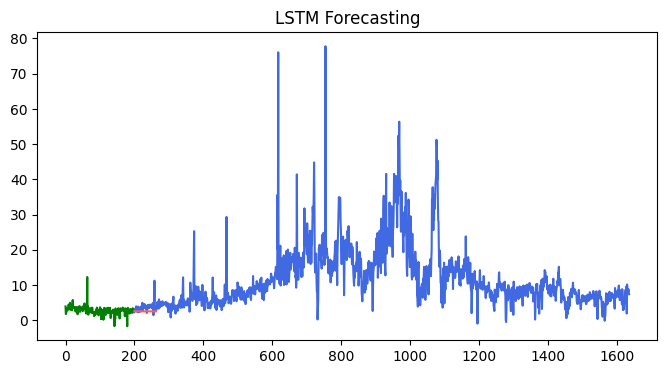

array([2.56720051, 2.55887528, 2.55329152, 2.54976511, 2.54763526,
       2.54640369, 2.54571957, 2.54535293, 2.54516628, 2.54507295,
       2.54502879, 2.54500879, 2.54500046, 2.54499587, 2.54499421,
       2.54499171, 2.54498879, 2.54498712, 2.54498546, 2.54498546,
       2.54498462, 2.54498462, 2.54498462, 2.54498462, 2.54498462,
       2.54498462, 2.54498462, 2.54498462, 2.54498462, 2.54498462,
       2.54498462, 2.54498462, 2.54498462, 2.54498462, 2.54498462,
       2.54498462, 2.54498462, 2.54498462, 2.54498462, 2.54498462,
       2.54498462, 2.54498462, 2.54498462, 2.54498462, 2.54498462,
       2.54498462, 2.54498462, 2.54498462, 2.54498462, 2.54498462,
       2.54498462, 2.54498462, 2.54498462, 2.54498462, 2.54498462,
       2.54498462, 2.54498462, 2.54498462, 2.54498462, 2.54498462,
       2.54498462, 2.54498462, 2.54498462, 2.54498462])

In [11]:
from lstm_wrapper import lstm_predict
lstm_predict(system_prices,column,0,200,64)

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


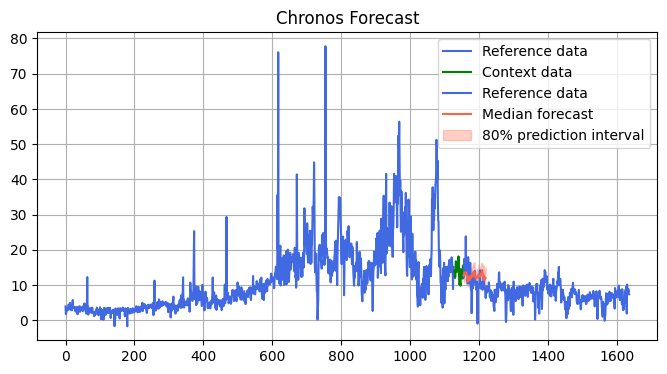

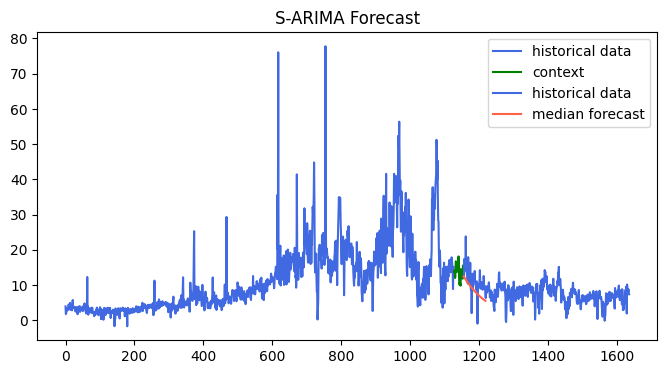

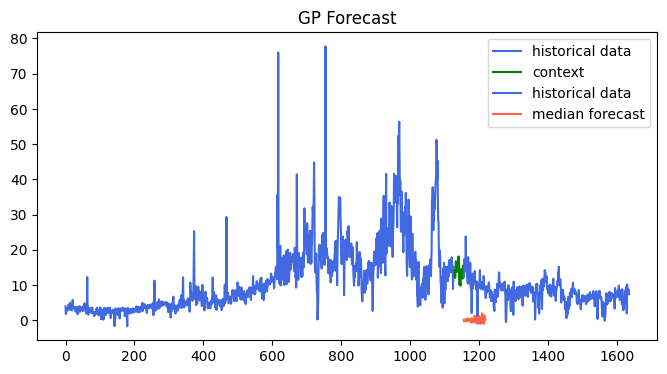

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


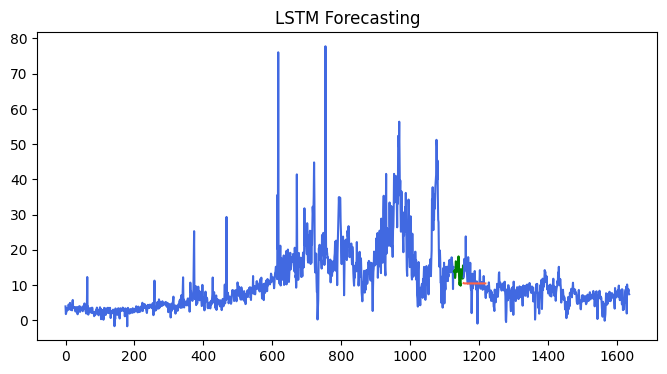


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.22043842275963538
- sarima MSE: 0.24492525727395698
- gp MSE: 2.140051940276707
- lstm MSE: 0.20106162265385286
NMSE
- chronos_mini NMSE: 1.1364461654510425
- sarima NMSE: 1.262685361138713
- gp NMSE: 11.032803587264924
- lstm NMSE: 1.0365511929537157



In [12]:
_ = utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

In [13]:
context_window_length = utils.find_first_occurrence_index(system_prices,end,"Date") - utils.find_first_occurrence_index(system_prices,start,"Date")
print(f"context_window_length: {context_window_length}")
#utils.whole_window_comparison_of_data(system_prices,column,context_window_length,prediction_length)

context_window_length: 28


## One Month Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


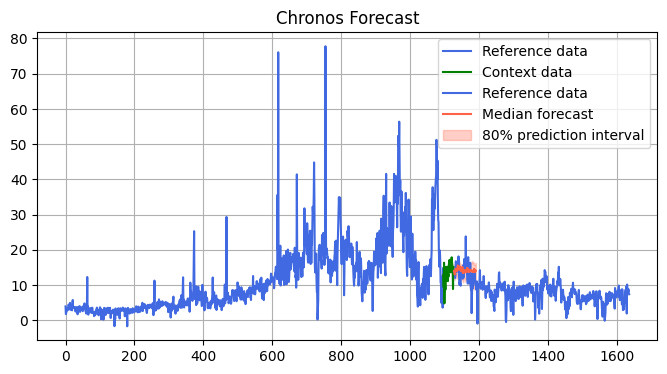

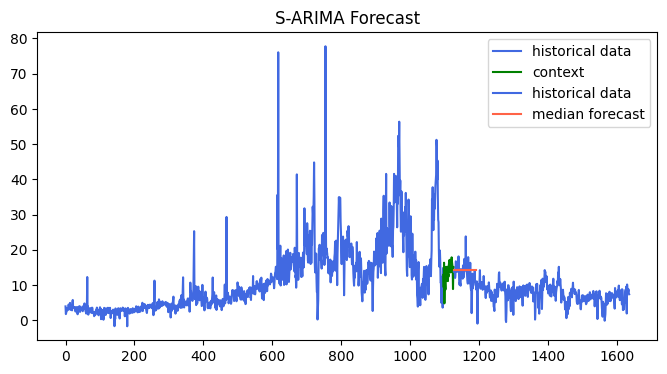

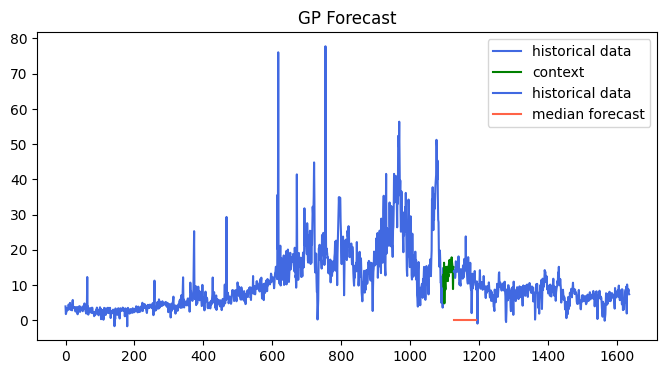

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


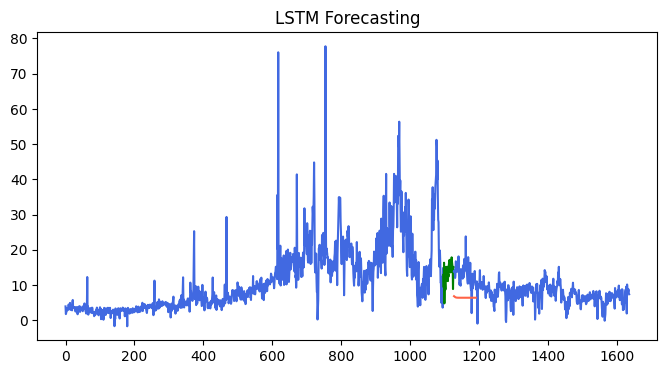


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.1712779975455555
- sarima MSE: 0.17897524818123925
- gp MSE: 2.7866350781249998
- lstm MSE: 0.8194581666813496
NMSE
- chronos_mini NMSE: 1.153798860990443
- sarima NMSE: 1.2056506991919478
- gp NMSE: 18.77191714762706
- lstm NMSE: 5.520206406516295



In [14]:
start = '2023-01-01'
end = '2023-02-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Two Month Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


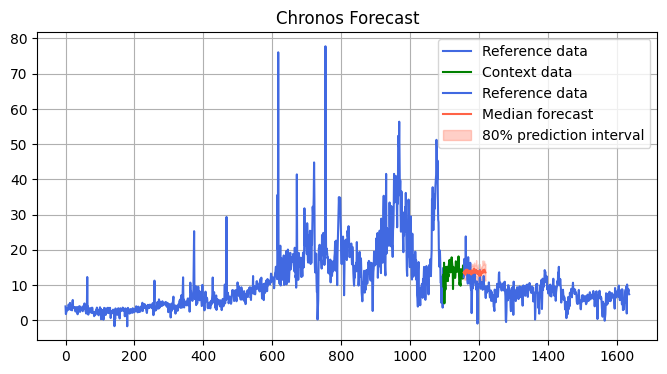

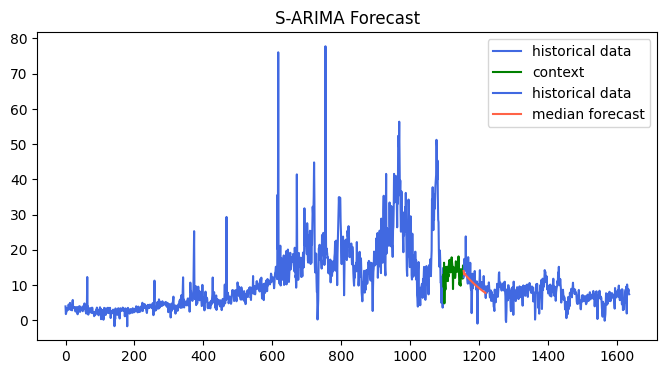

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


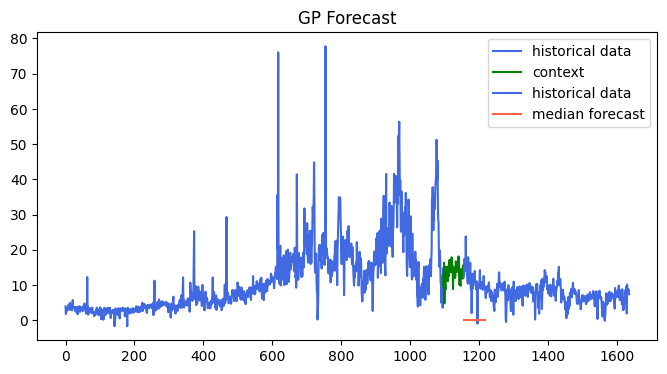

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


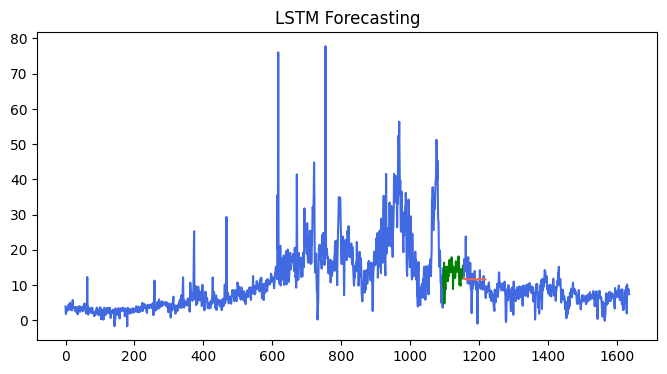


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.29551717123497295
- sarima MSE: 0.14960886469808093
- gp MSE: 2.1378503247070313
- lstm MSE: 0.19587200692158058
NMSE
- chronos_mini NMSE: 1.5235064371746172
- sarima NMSE: 0.7712921299069957
- gp NMSE: 11.021453399123343
- lstm NMSE: 1.009796696957634



In [15]:
start = '2023-01-01'
end = '2023-03-01'
column = 'Daily average'
prediction_length = 64
_ = utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Three Months Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


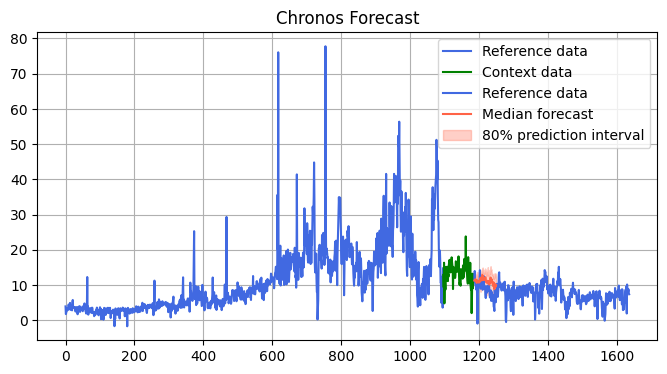

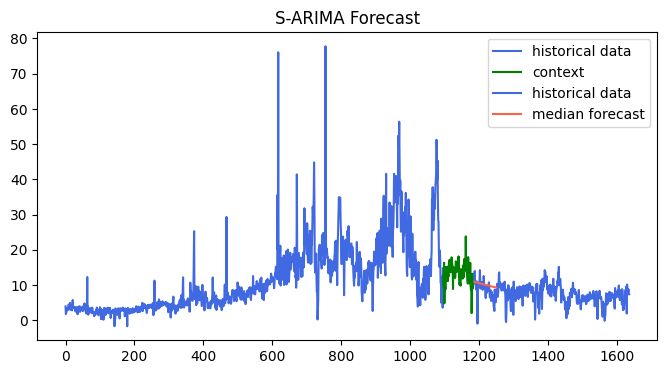

/opt/homebrew/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


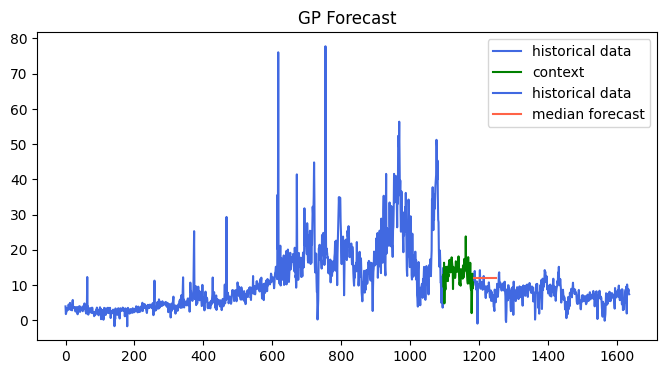

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


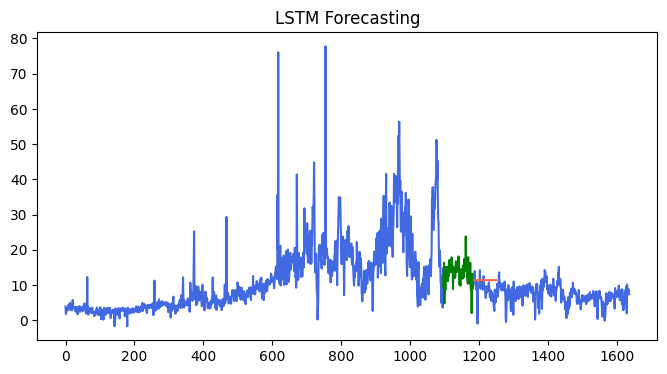


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.18651028435240236
- sarima MSE: 0.12055435634730258
- gp MSE: 0.2962920957719062
- lstm MSE: 0.22775645922237492
NMSE
- chronos_mini NMSE: 1.9097183942231963
- sarima NMSE: 1.2343816461358381
- gp NMSE: 3.033797666028071
- lstm NMSE: 2.3320467345291047



In [16]:
start = '2023-01-01'
end = '2023-04-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Six Months Prediction

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


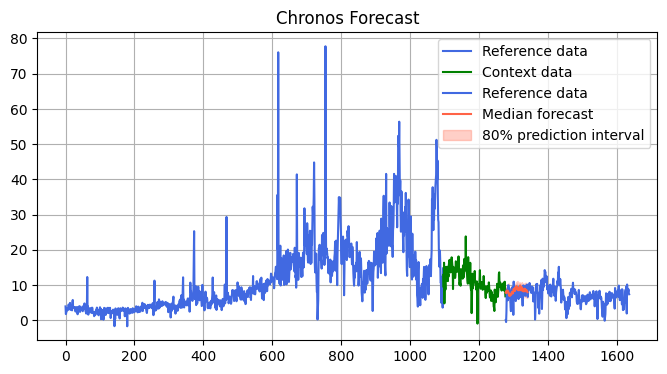

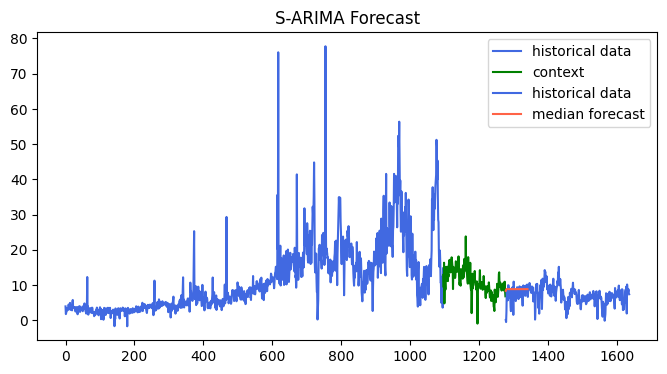

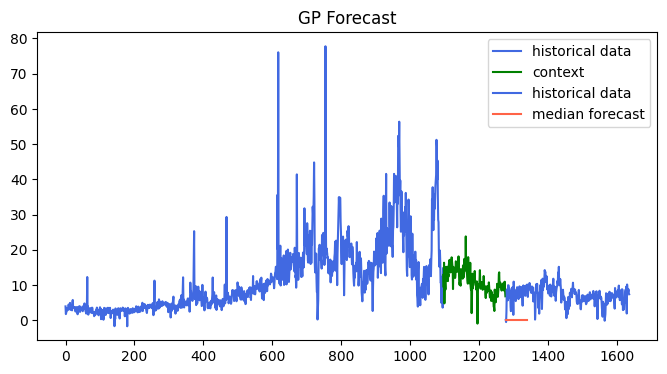

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


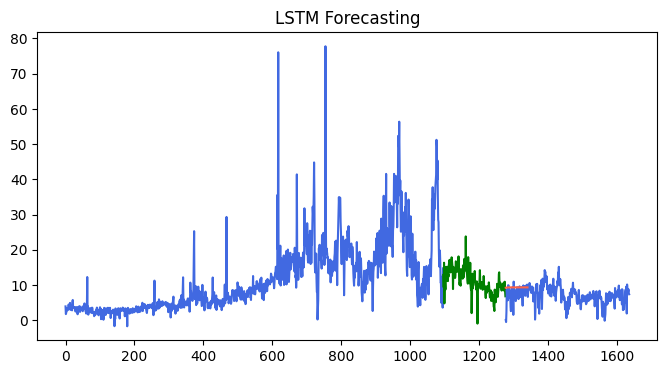


Results comparison for Daily average:

MSE
- chronos_mini MSE: 0.10389444494450384
- sarima MSE: 0.11722729251889463
- gp MSE: 0.9362812646484376
- lstm MSE: 0.14563800741803817
NMSE
- chronos_mini NMSE: 1.2092515772410497
- sarima NMSE: 1.3644356871042738
- gp NMSE: 10.897595118027173
- lstm NMSE: 1.6951145970372017



In [17]:
start = '2023-01-01'
end = '2023-07-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Having seen one anomaly, can you predict nect?

= = = > Chronos pipeline not initialized. Firing up mini pipeline. May take time..


/opt/homebrew/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


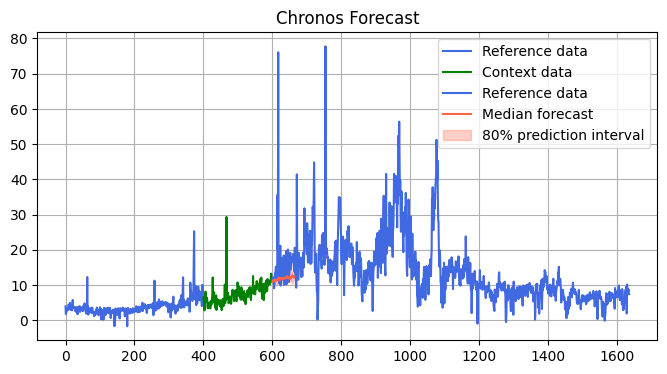

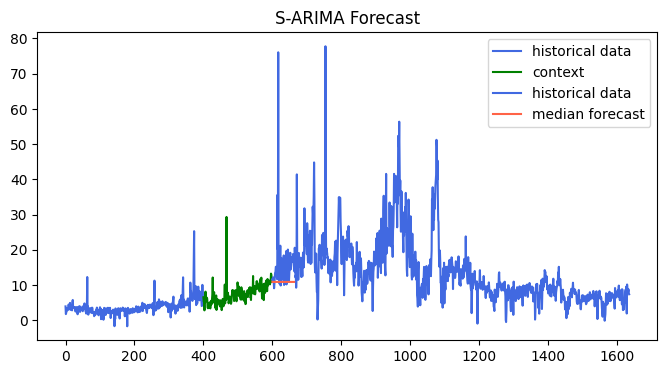

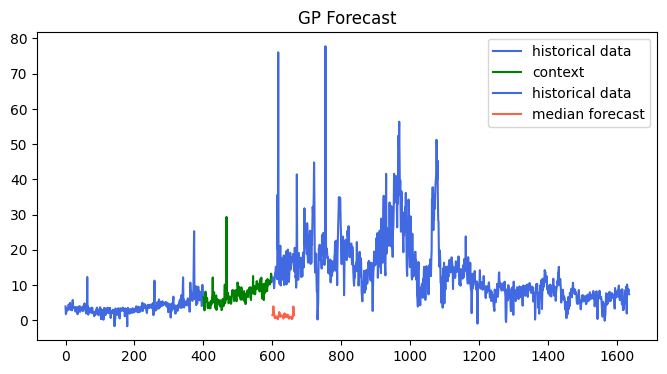

/opt/homebrew/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [18]:
_ = utils.compare_prediction_methods(system_prices,column,400,600,prediction_length)

## One Year Context Prediction

In [ ]:
start = '2022-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Two Year Context Comparison

In [ ]:
start = '2021-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

_ = utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

## Three Year Context

In [ ]:
start = '2020-06-01'
end = '2023-06-01'
column = 'Daily average'
prediction_length = 64

# utils.compare_prediction_methods(system_prices,column,start,end,prediction_length)

In [ ]:
values = lstm_predict(system_prices,column,0,200,64)


In [ ]:
len(values)

## Next steps 

- Fine tune
- Move context window around and get histogram of error 
- See how to extract attention weights
